In [100]:
import pandas as pd
import matplotlib.pyplot as plt

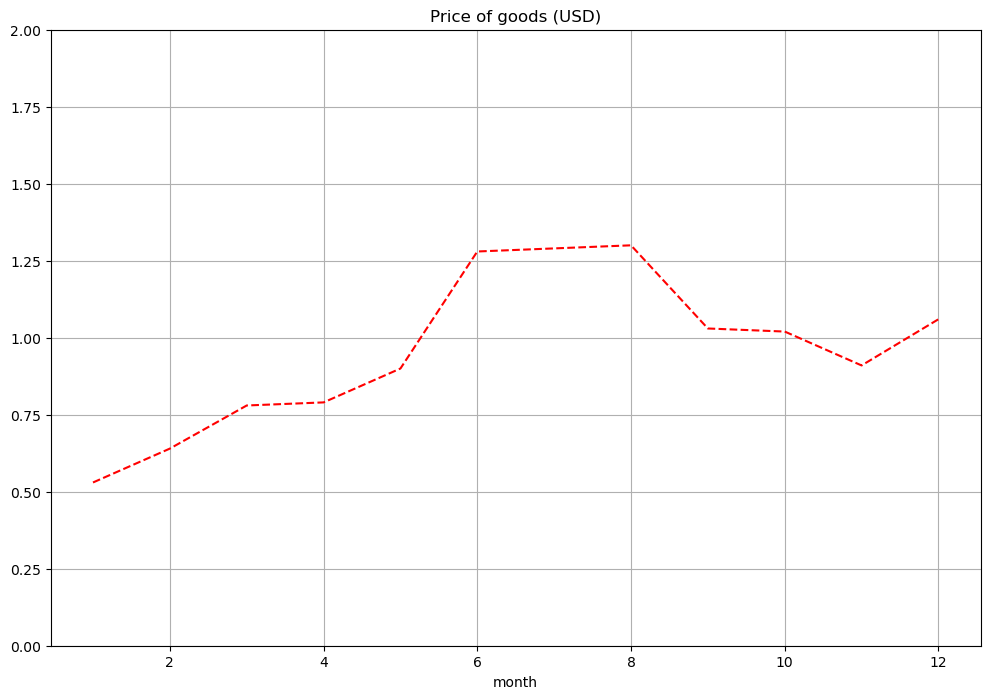

In [101]:
prices = [
	(1, 2.12),
	(2, 2.56),
	(3, 3.10),
	(4, 3.16),
	(5, 3.58),
	(6, 5.12),
	(7, 5.16),
	(8, 5.20),
	(9, 4.12),
	(10, 4.10),
	(11, 3.65),
	(12, 4.25),
]

prices_df = pd.DataFrame(prices, columns=['month', 'Price of goods'])
prices_df['Price of goods (USD)'] = round(prices_df['Price of goods'] / 4, 2)

fig = plt.figure(figsize=(12, 8))
plt.plot(prices_df.month, prices_df['Price of goods (USD)'],
         c='r', linestyle='dashed')
plt.grid(True)
plt.ylim(0, 2)
plt.title('Price of goods (USD)')
plt.xlabel('month')
plt.show()

In [102]:
import MetaTrader5 as mt # You have to install mt5 app on your machine and be logged in
import matplotlib.dates as mdates
from datetime import datetime
mt.initialize()

True

In [103]:
# price data of USDPLN: 1000 last records for 30 minutes interval

df = pd.DataFrame(mt.copy_rates_from_pos("USDPLN", mt.TIMEFRAME_M30, 1, 1000))
df['time'] = pd.to_datetime(df['time'], unit='s')
df = df.drop(columns=['spread', 'real_volume'])
df.set_index('time', inplace=True)
df = df.rename(columns={'tick_volume': 'volume'})
df.head(10)

,open,high,low,close,volume
time,,,,,
2023-12-21 23:00:00,3.93142,3.93152,3.92872,3.92932,293
2023-12-21 23:30:00,3.92932,3.93092,3.92343,3.92699,212
2023-12-22 00:00:00,3.92537,3.93117,3.91870,3.92957,124
2023-12-22 00:30:00,3.92957,3.92987,3.92407,3.92897,153
2023-12-22 01:00:00,3.92897,3.92997,3.92609,3.92749,605
2023-12-22 01:30:00,3.92749,3.92952,3.92682,3.92952,397
2023-12-22 02:00:00,3.92952,3.93212,3.92842,3.93082,227
2023-12-22 02:30:00,3.93082,3.93192,3.92792,3.93102,524
2023-12-22 03:00:00,3.93092,3.93272,3.92912,3.93162,695


In [104]:
df.describe()

,open,high,low,close,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.973248,3.975920,3.970794,3.973444,659.927000
std,0.040885,0.041060,0.040869,0.040911,504.325272
min,3.884990,3.886890,3.879500,3.884990,32.000000
25%,3.942045,3.944218,3.938645,3.942120,270.000000
50%,3.974020,3.976915,3.971820,3.974220,527.500000
75%,3.996870,4.000075,3.994408,3.997047,919.250000
max,4.062320,4.064720,4.055000,4.062330,4266.000000


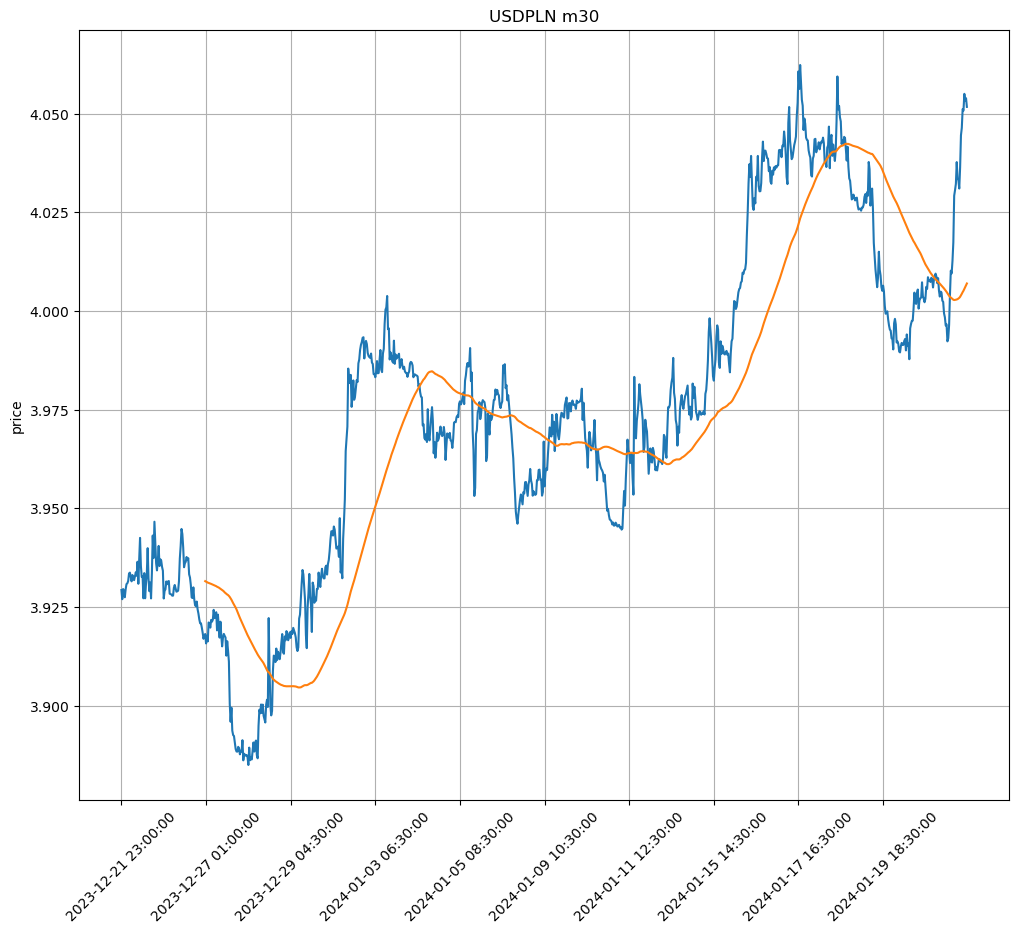

In [109]:
# one hundred rows moving average
dates = df.index.astype(str).to_list()
df['ma100'] = df['close'].rolling(window=100).mean()
Fig = plt.figure(figsize=(12, 10))
plt.plot(dates, df[['close', 'ma100']])
plt.xticks(dates[::100], rotation=45)
plt.grid(True)
plt.title("USDPLN m30")
plt.ylabel('price')
plt.show()